###  Q1

In [5]:
original_list=[1,2,3,4,5,6,7,8]
new_list = [x**2 for x in original_list if x % 2 == 0]
print(new_list)

[4, 16, 36, 64]


### Q 2

In [25]:
import time
import functools

def log_execution_time(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()  
        result = func(*args, **kwargs)  # Execute the functio
        end_time = time.time()  # Record the end time
        execution_time = end_time - start_time  # Calculate the execution time
        print(f"Function '{func.__name__}' executed in {execution_time:.4f} seconds")
        return result
    
    return wrapper

@log_execution_time
def example_function(n):
    sum = 0
    for i in range(n):
        sum += i
    return sum

example_function(100000000)


Function 'example_function' executed in 7.0106 seconds


4999999950000000

### Q3

In [8]:
def fibonacci_generator(n):
    a, b = 0, 1
    while a <= n:
        yield a
        a, b = b, a + b

n = 10
for num in fibonacci_generator(n):
    print(num)


0
1
1
2
3
5
8


### Q4

In [13]:
def read_file(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            return content
    except FileNotFoundError:
        print("The file does not exist.")
        return None

# Example 
file_path = 'Mohit_yadav_text'
content = read_file(file_path)
if content is not None:
    print(content)


The file does not exist.


###  Q5

In [19]:
import numpy as np

class SimpleLinearRegression:
    def __init__(self):
        self.slope = 0
        self.intercept = 0

    def fit(self, X, y):
        X_mean = np.mean(X)
        y_mean = np.mean(y)
        
        self.slope = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
        self.intercept = y_mean - self.slope * X_mean

    def predict(self, X):
        return self.slope * X + self.intercept




In [20]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])
    
model = SimpleLinearRegression()
model.fit(X, y)

predictions = model.predict(X)
print("Predictions:", predictions)

print("Slope (m):", model.slope)
print("Intercept (b):", model.intercept)

Predictions: [ 1.2  3.4  5.6  7.8 10. ]
Slope (m): 2.2
Intercept (b): -1.0000000000000009


### Q6

In [21]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    
    epsilon = 1e-5 
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    
    return cost

# Example usage:
if __name__ == "__main__":
    X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])
    y = np.array([0, 0, 1, 1])
    theta = np.array([0, 0])
    
    cost = compute_cost(theta, X, y)
    print("Cost:", cost)


Cost: 0.6931271807599427


### Q7

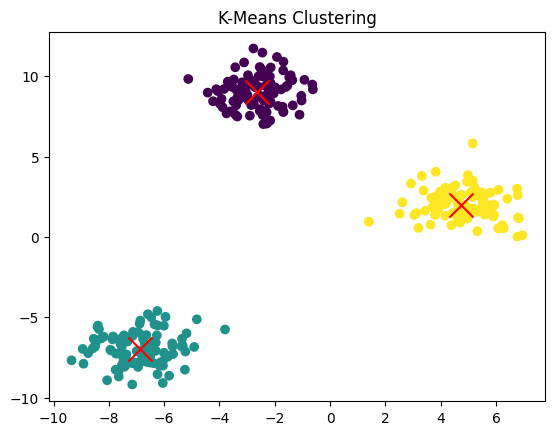

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, tol=0.0001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Assign each point to the nearest centroid
            labels = self._assign_clusters(X)
            
            # Calculate new centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(np.linalg.norm(self.centroids - new_centroids, axis=1) < self.tol):
                break
                
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._assign_clusters(X)

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='x')
plt.title('K-Means Clustering')
plt.show()


### Q8

Optimal parameters: [[4.21509609]
 [2.77011344]]


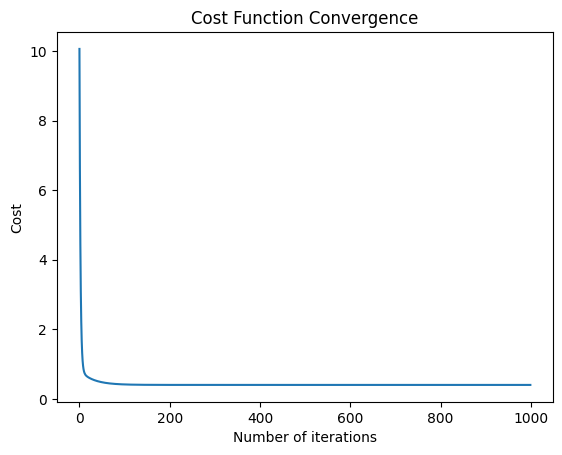

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples=100):
    np.random.seed(42)
    X = 2 * np.random.rand(n_samples, 1)
    y = 4 + 3 * X + np.random.randn(n_samples, 1)
    return X, y

def hypothesis(X, theta):
    return np.dot(X, theta)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        gradients = (1/m) * X.T.dot(hypothesis(X, theta) - y)
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

# Generate data
X, y = generate_data()

# Add intercept term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X] 

# Initialize theta
theta = np.random.randn(2, 1)

learning_rate = 0.1
iterations = 1000

theta_optimal, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

print(f"Optimal parameters: {theta_optimal}")


plt.plot(range(iterations), cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()


### Q 9

In [27]:
import numpy as np


def standardize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std


def compute_covariance_matrix(X):
    return np.cov(X.T)

def compute_eigenvalues_and_eigenvectors(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    return eigenvalues[sorted_indices], eigenvectors[:, sorted_indices]


def select_principal_components(eigenvectors, n_components):
    return eigenvectors[:, :n_components]


def transform_data(X, principal_components):
    return np.dot(X, principal_components)


def pca(X, n_components):
    X_standardized = standardize_data(X)
    covariance_matrix = compute_covariance_matrix(X_standardized)
    eigenvalues, eigenvectors = compute_eigenvalues_and_eigenvectors(covariance_matrix)
    sorted_eigenvalues, sorted_eigenvectors = sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors)
    principal_components = select_principal_components(sorted_eigenvectors, n_components)
    X_pca = transform_data(X_standardized, principal_components)
    return X_pca, sorted_eigenvalues


if __name__ == "__main__":
    
    np.random.seed(42)
    X = np.random.rand(100, 5)

    
    n_components = 2
    X_pca, explained_variances = pca(X, n_components)

    
    print("Transformed Data (first 5 samples):")
    print(X_pca[:5])
    print("Explained Variances:")
    print(explained_variances[:n_components])


Transformed Data (first 5 samples):
[[-1.48584759  0.10517099]
 [-0.09087782  1.46554212]
 [-2.80234709  0.29750159]
 [-0.54966191  0.02257206]
 [ 0.84682029 -0.75997465]]
Explained Variances:
[1.46493849 1.17242457]


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Sample dataset
data = {
    'age': [25, 30, 35, np.nan, 40],
    'salary': [50000, np.nan, 60000, 70000, 80000],
    'department': ['sales', 'engineering', 'engineering', 'sales', np.nan]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


num_imputer = SimpleImputer(strategy='mean')
df['age'] = num_imputer.fit_transform(df[['age']])
df['salary'] = num_imputer.fit_transform(df[['salary']])


cat_imputer = SimpleImputer(strategy='most_frequent')
df['department'] = cat_imputer.fit_transform(df[['department']])

print("\nDataFrame after handling missing values:")
print(df)

label_encoder = LabelEncoder()
df['department_label'] = label_encoder.fit_transform(df['department'])


one_hot_encoder = OneHotEncoder(sparse=False)
department_one_hot = one_hot_encoder.fit_transform(df[['department']])
department_one_hot_df = pd.DataFrame(department_one_hot, columns=one_hot_encoder.get_feature_names_out(['department']))


df = pd.concat([df, department_one_hot_df], axis=1)

print("\nDataFrame after encoding categorical data:")
print(df)


Original DataFrame:
    age   salary   department
0  25.0  50000.0        sales
1  30.0      NaN  engineering
2  35.0  60000.0  engineering
3   NaN  70000.0        sales
4  40.0  80000.0          NaN

DataFrame after handling missing values:
    age   salary   department
0  25.0  50000.0        sales
1  30.0  65000.0  engineering
2  35.0  60000.0  engineering
3  32.5  70000.0        sales
4  40.0  80000.0  engineering

DataFrame after encoding categorical data:
    age   salary   department  department_label  department_engineering  \
0  25.0  50000.0        sales                 1                     0.0   
1  30.0  65000.0  engineering                 0                     1.0   
2  35.0  60000.0  engineering                 0                     1.0   
3  32.5  70000.0        sales                 1                     0.0   
4  40.0  80000.0  engineering                 0                     1.0   

   department_sales  
0               1.0  
1               0.0  
2               0

C:\Users\91871\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
